In [107]:
import cv2, os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [108]:
images_dir = 'COMP9517_25T3_Lab2_images'
images_name = os.listdir(images_dir)

In [109]:
input_images = []
img_grays = []
for i in range(2):
    img_name = os.path.join(images_dir, images_name[i])
    img = cv2.imread(img_name)
    input_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_grays.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

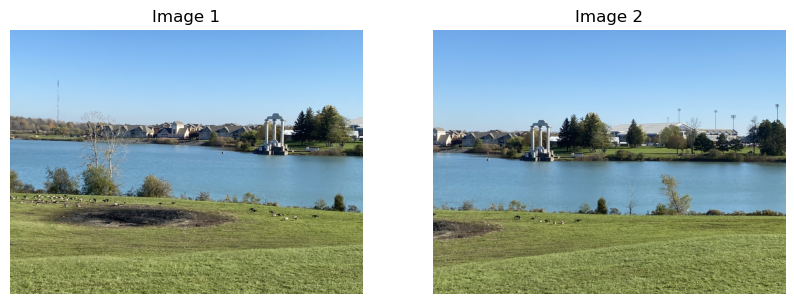

In [110]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(input_images[0], cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(input_images[1], cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

In [111]:
def draw_kp(img, n_features=0):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create(
        nfeatures=n_features,
        nOctaveLayers=3,
        contrastThreshold=0.04,
        edgeThreshold=10,
        sigma=1.6
    )
    kps = sift.detect(gray, None)
    img_kp = cv2.drawKeypoints(img, kps, 0, color=(255,0,0), flags=cv2.DrawMatchesFlags_DEFAULT)
    return img_kp

# Task 1

## Default Parameters

In [112]:
img1_kps_default = draw_kp(input_images[0])
img2_kps_default = draw_kp(input_images[1])

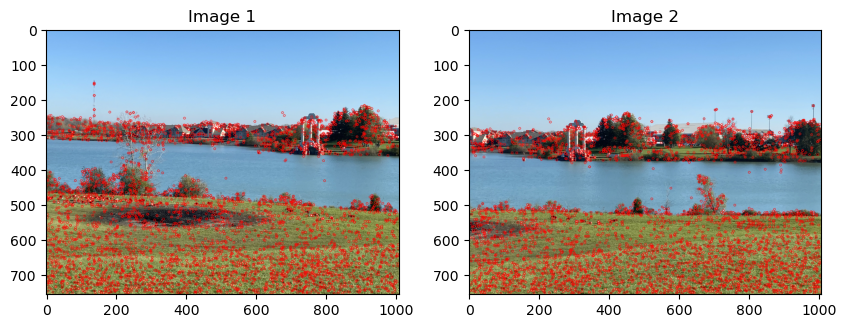

In [113]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(img1_kps_default, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(img2_kps_default, cmap='gray', vmin=0, vmax=255)

plt.show()

## Reduce the number of features to 20 by setting nfeatures as 20 in SIFT_create function

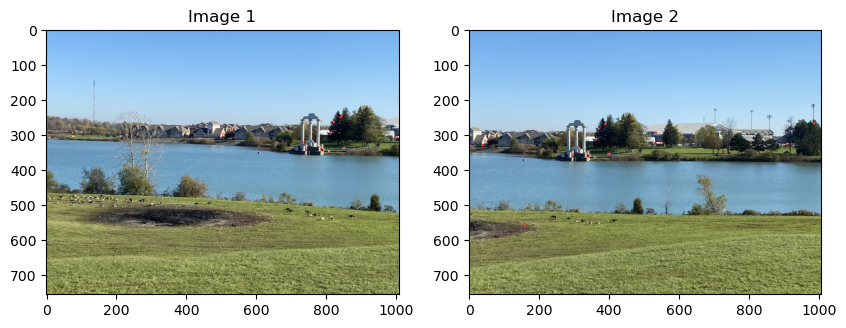

In [114]:
img1_kps_reduced = draw_kp(input_images[0], 20)
img2_kps_reduced = draw_kp(input_images[1], 20)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(img1_kps_reduced, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(img2_kps_reduced, cmap='gray', vmin=0, vmax=255)

plt.show()

### Question 1: a brief description of the approach you used for b).
Answer: I reduced the number of features to 20 by setting nfeatures as 20 in SIFT_create function

# Taks 2 
## a) Scaled with a factor og 120 precent

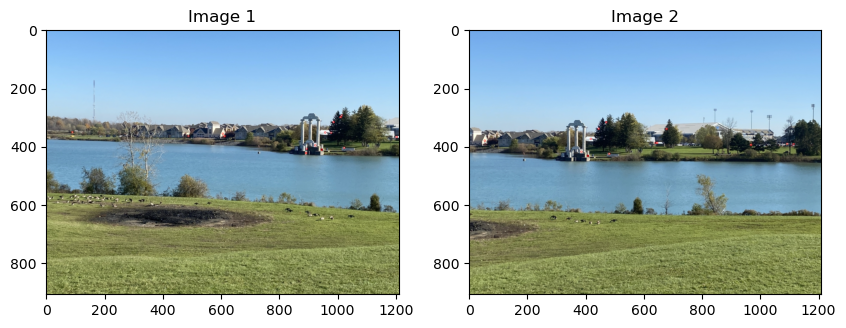

In [115]:
img1_resize = cv2.resize(input_images[0], (0,0), fx=1.2, fy=1.2)
img2_resize = cv2.resize(input_images[1], (0,0), fx=1.2, fy=1.2)

img1_resize_kps = draw_kp(img1_resize, 20)
img2_resize_kps = draw_kp(img2_resize, 20)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(img1_resize_kps, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(img2_resize_kps, cmap='gray', vmin=0, vmax=255)

plt.show()

## b) Rotated clockwish by 60 degress

In [116]:
img_height, img_width = input_images[0].shape[:2]
center = (img_width // 2, img_height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, -60, 1)

In [117]:
cos_val = np.abs(rotation_matrix[0, 0])
sin_val = np.abs(rotation_matrix[0, 1])

new_width = int((img_height * sin_val) + (img_width * cos_val))
new_height = int((img_height * cos_val) + (img_width * sin_val))

rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

img1_rotated = cv2.warpAffine(input_images[0], rotation_matrix, (new_width, new_height))
img2_rotated = cv2.warpAffine(input_images[1], rotation_matrix, (new_width, new_height))

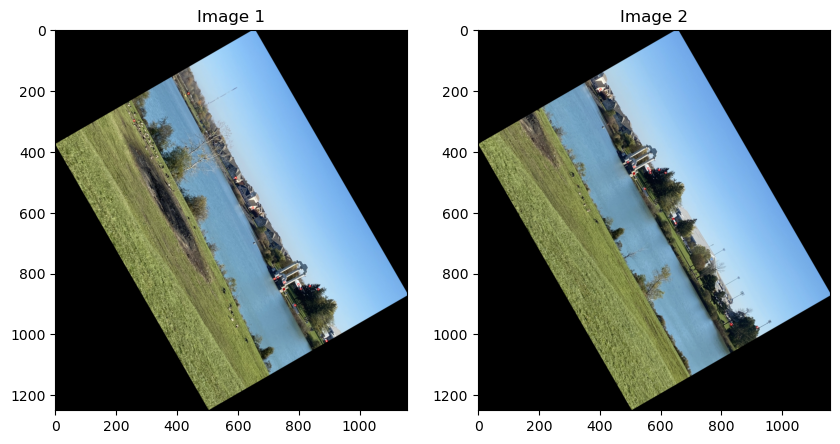

In [118]:
img1_rotated_kps = draw_kp(img1_rotated, 20)
img2_rotated_kps = draw_kp(img2_rotated, 20)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(img1_rotated_kps, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(img2_rotated_kps, cmap='gray', vmin=0, vmax=255)

plt.show()

## c) Contaminated with salt and pepper noise

In [119]:
from skimage.util import random_noise

In [120]:
img1_noise = random_noise(input_images[0], mode='s&p', amount=0.1)
img2_noise = random_noise(input_images[1], mode='s&p', amount=0.1)

img1_noise = np.array(img1_noise*255, dtype=np.uint8)
img2_noise = np.array(img2_noise*255, dtype=np.uint8)

img1_noise_kps = draw_kp(img1_noise, 20)
img2_noise_kps = draw_kp(img2_noise, 20)

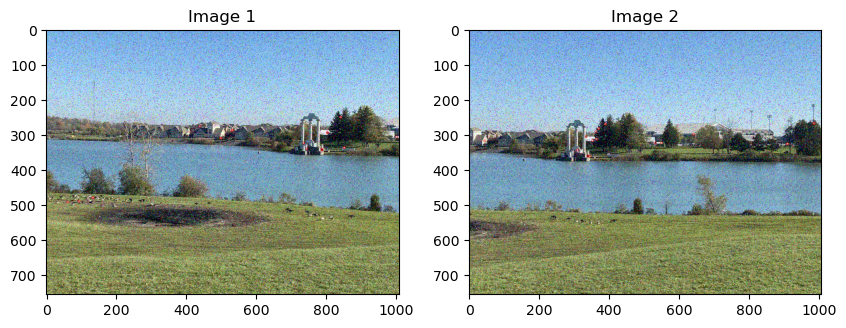

In [121]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(img1_noise_kps, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(img2_noise_kps, cmap='gray', vmin=0, vmax=255)

plt.show()

### Question 2: Are the keypoints of the processed pictures roughly the same as those of the originals?
Answer: Yes, the keypoints are roughly the same.
### Question 3: What does this say about the robustness of SIFT in each case?
Answer: All three examples demonstrate the robustness of SIFT and SIFT is robust to scaling, rotation and noise.
### Question 4: To which of the three types of processing is SIFT most robust?
Answer: Scaling is the most robust.

# Task 3

In [122]:
sift = cv2.SIFT_create(
    nfeatures=20,
    nOctaveLayers=3,
    contrastThreshold=0.04,
    edgeThreshold=10,
    sigma=1.6
)
kp1, des1 = sift.detectAndCompute(img_grays[0], None)
kp2, des2 = sift.detectAndCompute(img_grays[1], None)

In [123]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
threshold = 0.6
for m, n in matches:
    if m.distance < threshold * n.distance:
        good_matches.append([m])

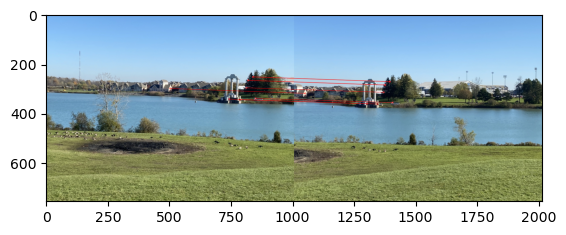

In [124]:
img_match = cv2.drawMatchesKnn(
    input_images[0], kp1,
    input_images[1], kp2,
    good_matches, None,
    matchColor=(255, 0, 0),
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.imshow(img_match)
plt.show()

In [125]:
src_pts, dst_pts = [], []

for m in good_matches:
    src_pt = kp1[m[0].queryIdx].pt
    dst_pt = kp2[m[0].trainIdx].pt
    src_pts.append(src_pt)
    dst_pts.append(dst_pt)
    
src_pts = np.array(src_pts, np.float32).reshape(-1, 1, 2)
dst_pts = np.array(dst_pts, np.float32).reshape(-1, 1, 2)

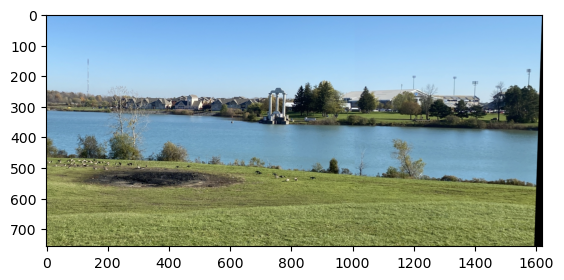

In [126]:
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

result = cv2.warpPerspective(input_images[1], M, (1620, img_height))
result[:, 0:img_width, :] = input_images[0]

plt.imshow(result)
plt.show()

# My own image

In [129]:
my_img1 = cv2.imread('COMP9517_25T3_Lab2_images/Image3.jpg')
my_img2 = cv2.imread('COMP9517_25T3_Lab2_images/Image4.jpg')

my_img1 = cv2.resize(my_img1, None, fx=0.5, fy=0.5)
my_img2 = cv2.resize(my_img2, None, fx=0.5, fy=0.5)

my_img1 = cv2.cvtColor(my_img1, cv2.COLOR_BGR2RGB)
my_img2 = cv2.cvtColor(my_img2, cv2.COLOR_BGR2RGB)

my_img1_gray = cv2.cvtColor(my_img1, cv2.COLOR_RGB2GRAY)
my_img2_gray = cv2.cvtColor(my_img2, cv2.COLOR_RGB2GRAY)

my_img_height, my_img_width = my_img1.shape[:2]

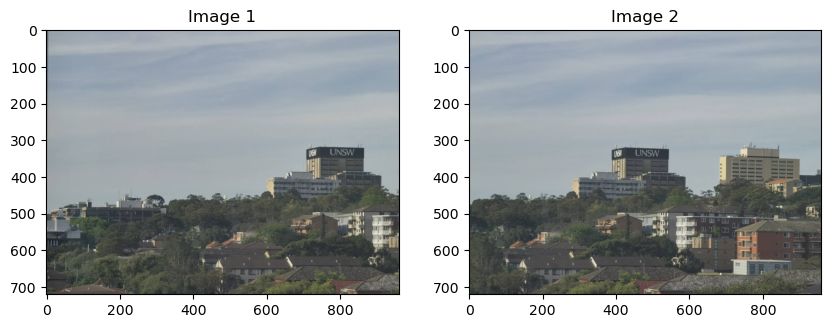

In [130]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Image 1')
plt.imshow(my_img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title('Image 2')
plt.imshow(my_img2, cmap='gray', vmin=0, vmax=255)

plt.show()

In [131]:
sift = cv2.SIFT_create(
    nfeatures=20,
    nOctaveLayers=3,
    contrastThreshold=0.04,
    edgeThreshold=10,
    sigma=1.6
)
my_kp1, my_des1 = sift.detectAndCompute(my_img1_gray, None)
my_kp2, my_des2 = sift.detectAndCompute(my_img2_gray, None)

In [132]:
my_bf = cv2.BFMatcher()
my_matches = my_bf.knnMatch(my_des1, my_des2, k=2)

good_matches = []
threshold = 0.6
for m, n in my_matches:
    if m.distance < threshold * n.distance:
        good_matches.append([m])

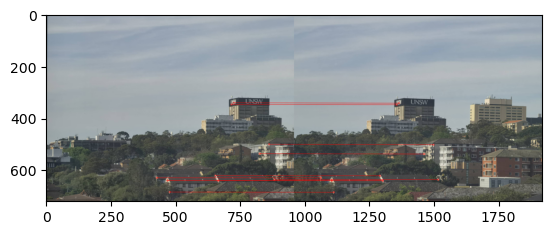

In [133]:
my_img_match = cv2.drawMatchesKnn(
    my_img1, my_kp1,
    my_img2, my_kp2,
    good_matches, None,
    matchColor=(255, 0, 0),
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.imshow(my_img_match)
plt.show()

In [134]:
src_pts, dst_pts = [], []

for m in good_matches:
    src_pt = my_kp1[m[0].queryIdx].pt
    dst_pt = my_kp2[m[0].trainIdx].pt
    src_pts.append(src_pt)
    dst_pts.append(dst_pt)
    
src_pts = np.array(src_pts, np.float32).reshape(-1, 1, 2)
dst_pts = np.array(dst_pts, np.float32).reshape(-1, 1, 2)

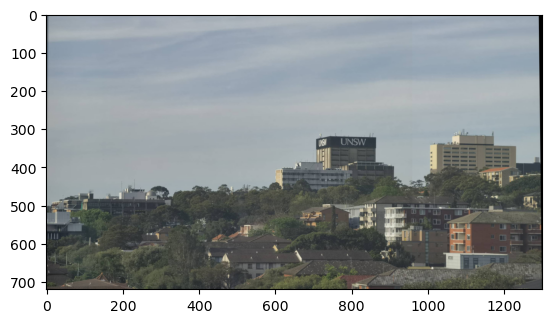

In [135]:
M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

my_result = cv2.warpPerspective(my_img2, M, (1300, my_img_height))
my_result[:, 0:my_img_width, :] = my_img1

plt.imshow(my_result)
plt.show()